<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Actividades_clase/Actividad_07_derivadas.pynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Actividad 7
### Métodos computacionales para físicos  y astrónomos
### Universidad de Antioquia
### Prof: Hernan D. Salinas Jiménez
Ref: https://github.com/restrepo/ComputationalMethods

El potencial eléctrico de un anillo de radio R, en la parte superior z del anillo viene dado por: 


\begin{equation}
V = \frac{kq_{tot}z}{\sqrt{z^2+R^2}}
\end{equation}

Calcule el campo eléctrico para z>0 y R=0.1mm. Reescale el problema en unidades de $kq_{top}$ empleando:

1. La librearia sympy.

2. Calcular el campo en el punto  $z = 0.1mm$ empleando el metodo [misc.derivative](https://docs.scipy.org/doc/scipy/reference/generated/scipy.misc.derivative.html)

3. Calcular el campo para diferentes valores de z con z>0,,  empleando misc derivative. Construya un grafico de E vs z.

4. Entender la generalizacion de la siguiente función, y aplicarla para calcular la derivada.


```python
import numpy as np
from scipy import misc
def derivative(func,x0,**kwargs):
    '''
    Vectorized replacement of scipy.misc derivative:
        from scipy.misc import derivative
    For usage check the derivative help, e.g, in jupyter: 
        from scipy.misc import derivative
        derivative?
    '''
    try:
        #x0: can be an array or a list  
        nn=np.asarray(x0).shape[0] ## force error if float is used 
        fp=np.vectorize(misc.derivative)
    except IndexError:
        fp=misc.derivative
        
    return fp(func,x0,**kwargs)

assert isinstance(derivative(np.sin,1,dx=1E-6),float)

```

In [ ]:
import numpy as np
from scipy.misc import derivative
import sympy as sp
import matplotlib.pyplot as plt







In [ ]:
k = 1
q = 1
z=  sp.Symbol('z')
R= 0.1e-3
num= k*q*z
den = sp.sqrt(z**2+R**2)
V= num/den

V


z/sqrt(z**2 + 1.0e-8)

In [ ]:
E = -(sp.diff(V,z))
E

z**2/(z**2 + 1.0e-8)**(3/2) - 1/sqrt(z**2 + 1.0e-8)

In [ ]:
V_np= sp.lambdify(z,V,"numpy")
E_np= sp.lambdify(z,E,"numpy")




In [ ]:
V_np(0.001)

0.9950371902099892

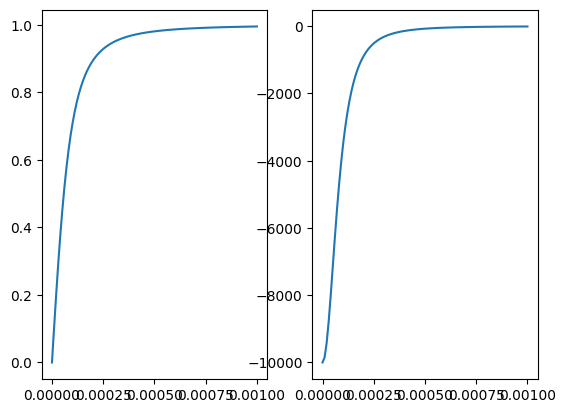

In [ ]:
z_arr= np.linspace(0,0.001,100)

fig, axs = plt.subplots(nrows=1,ncols=2)

axs[0].plot(z_arr,V_np(z_arr))
axs[1].plot(z_arr,E_np(z_arr))



In [ ]:

R= 0.1e-3


def potencial(z,R,kq):
  if(z>0):

    V=z*kq/(z**2+R**2)**(1/2)
  else:
     V=0 

  return V


#derivative(potencial,0.0002,dx=1,args=(R,) )


In [ ]:
derivada = np.vectorize(derivative(potencial,0.0002,dx=1,args=(R,)))



<ipython-input-8-59410346bd66>:1: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  derivada = np.vectorize(derivative(potencial,0.0002,dx=1,args=(R,)))


TypeError: ignored

In [ ]:
z= np.linspace(0,0.002,100)
R= 0.1E-3

GradV= derivative(potencial,z,dx=1E-6, args= (R,))
CampoElec= -GradV
plt.plot(z,CampoElec)


<ipython-input-9-85d2da8bf09a>:4: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  GradV= derivative(potencial,z,dx=1E-6, args= (R,))


TypeError: ignored

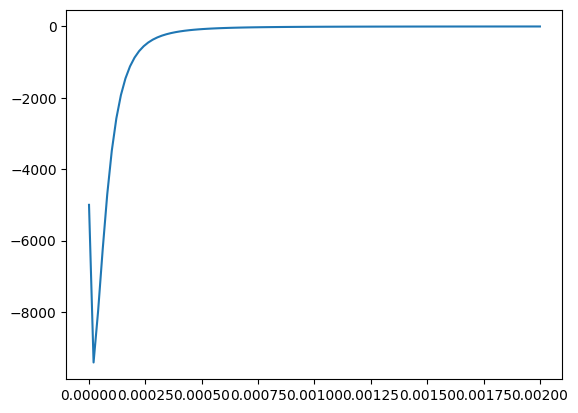

In [ ]:
z= np.linspace(0,0.002,100)
R= 0.1E-3
kq= 1

derivative = np.vectorize(derivative, excluded=['args'])
gradV= derivative(potencial,z, dx=1E-6, args=(R,kq))
CampoEle= -gradV
plt.plot(z, CampoEle)

In [ ]:


def potencial(z,R,kq,select):
  if(select=="Anillo"):

    V= z*kq/np.sqrt(z**2+R**2)
  elif(select=="disco"):
    V= (2*kq/R**2)*(np.sqrt(z**2+R**2)- z)

  else:
     print("Error, lapalabra no es la correcta")

  return V

In [ ]:
import numpy as np
from scipy.misc import derivative

z= np.linspace(0,0.002,100)
R= 0.1E-3
kq= 1
select= "otra cosa"

def potencial(z,R,kq,select):
  if(select=="Anillo"):

    V= z*kq/np.sqrt(z**2+R**2)
  elif(select=="disco"):
    V= (2*kq/R**2)*(np.sqrt(z**2+R**2)- z)

  else:
     print("Error, lapalabra no es la correcta")

  return V



derivative = np.vectorize(derivative, excluded=['args'])
try:
  gradV= derivative(potencial,z, dx=1E-6, args=(R,kq, select))
  CampoEle= -gradV
  np.savetxt("campo_electrico.txt",CampoEle)
except:
  print("Error, la palabra no es la correcta")

np.savetxt("campo_electrico.txt",CampoEle)

#plt.plot(z, CampoEle)

Error, lapalabra no es la correcta
Error, la palabra no es la correcta


In [ ]:
potencial(0.001,0.1E-3,kq=1,select="Anillo")

0.9950371902099892